# New York City's Preliminary Flood Insurance Rate Map (PFIRM) Exploratory Data Analysis Using Python
Author: Mark Bauer

# Introduction

This notebook demonstrates how to analyze FEMA's Preliminary Flood Insurance Rate Map (i.e. PFIRM) with Python. The PFIRM is for New York City.

# 1. Import Libraries

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import geopandas as gpd

plt.rcParams['savefig.facecolor'] = 'white'
%matplotlib inline

In [2]:
# printing packages and versions
%reload_ext watermark
%watermark -v -p numpy,pandas,seaborn,matplotlib,geopandas

Python implementation: CPython
Python version       : 3.8.13
IPython version      : 8.4.0

numpy     : 1.23.1
pandas    : 1.4.3
seaborn   : 0.11.2
matplotlib: 3.5.2
geopandas : 0.11.1



# 2. Data

For this analysis, we are interested in the special flood hazard area shapefile - `s_fld_haz_ar.shp`. This contains information about the flood zone. A shapefile is geospatial vector data for geographic information system software and stores geometric location and associated attribute information.

Data description from metadata:

>Entity_Type_Label: s_fld_haz_ar  
Entity_Type_Definition: Location and attributes for flood insurance risk zones on the DFIRM.


For more information about our columns and their descriptions, please find the [metadata files](https://github.com/mebauer/nyc-floodzone-analysis/blob/master/data/pfirm-nyc/360497_PRELIM_metadata.txt) located in the `pfirm_nyc` folder.

## 2.1 Inspection

In [3]:
# reading in shapefile
path = 'data/pfirm-nyc/s_fld_haz_ar.shp'
pfirm_gdf = gpd.read_file(path)

rows = pfirm_gdf.shape[0]
columns = pfirm_gdf.shape[1]
print('number of rows: {:,}.\nnumber of columns: {}.'.format(rows, columns))

# previewing data
pfirm_gdf.head()

number of rows: 3,985.
number of columns: 15.


,FLD_AR_ID,FLD_ZONE,FLOODWAY,SFHA_TF,STATIC_BFE,V_DATUM,DEPTH,LEN_UNIT,VELOCITY,VEL_UNIT,AR_REVERT,BFE_REVERT,DEP_REVERT,SOURCE_CIT,geometry
0,81,AE,None,T,13.0,NAVD88,-9999.0,FEET,-9999.0,None,None,-9999.0,-9999.0,STUDY4,"POLYGON ((1032001.691 263867.839, 1032006.047 ..."
1,82,X,None,F,-9999.0,None,-9999.0,None,-9999.0,None,None,-9999.0,-9999.0,STUDY4,"POLYGON ((1033748.952 263778.464, 1033752.656 ..."
2,83,0.2 PCT ANNUAL CHANCE FLOOD HAZARD,None,F,-9999.0,None,-9999.0,None,-9999.0,None,None,-9999.0,-9999.0,STUDY4,"POLYGON ((1033309.701 263544.181, 1033322.210 ..."
3,84,0.2 PCT ANNUAL CHANCE FLOOD HAZARD,None,F,-9999.0,None,-9999.0,None,-9999.0,None,None,-9999.0,-9999.0,STUDY4,"POLYGON ((1033414.148 262658.868, 1033414.934 ..."
4,85,0.2 PCT ANNUAL CHANCE FLOOD HAZARD,None,F,-9999.0,None,-9999.0,None,-9999.0,None,None,-9999.0,-9999.0,STUDY4,"POLYGON ((1034089.115 262466.034, 1034089.402 ..."


In this dataset, each row is a flood zone geometry. The type of flood zone can be inspected under the `FLD_ZONE` column. Additionally, there are 15 columns that contain information about each flood zone row.

In [4]:
# python type object
type(pfirm_gdf)

geopandas.geodataframe.GeoDataFrame

We read the shapefile into Python as a GeoDataFrame. This type is similar to a pandas dataframe, but includes additional spatial information - mainly, our `geometry` column. The geometry column contains polygons that represent the physical space of each flood zone.

In [5]:
# summary of the data
pfirm_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3985 entries, 0 to 3984
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FLD_AR_ID   3985 non-null   object  
 1   FLD_ZONE    3985 non-null   object  
 2   FLOODWAY    47 non-null     object  
 3   SFHA_TF     3985 non-null   object  
 4   STATIC_BFE  3985 non-null   float64 
 5   V_DATUM     1153 non-null   object  
 6   DEPTH       3985 non-null   float64 
 7   LEN_UNIT    1165 non-null   object  
 8   VELOCITY    3985 non-null   float64 
 9   VEL_UNIT    0 non-null      object  
 10  AR_REVERT   0 non-null      object  
 11  BFE_REVERT  3985 non-null   float64 
 12  DEP_REVERT  3985 non-null   float64 
 13  SOURCE_CIT  3985 non-null   object  
 14  geometry    3985 non-null   geometry
dtypes: float64(5), geometry(1), object(9)
memory usage: 467.1+ KB


In [6]:
# summary statistics for string columns
pfirm_gdf.describe()

,STATIC_BFE,DEPTH,VELOCITY,BFE_REVERT,DEP_REVERT
count,3985.000000,3985.000000,3985.0,3985.0,3985.0
mean,-7101.950314,-9968.883061,-9999.0,-9999.0,-9999.0
std,4540.905248,548.067414,0.0,0.0,0.0
min,-9999.000000,-9999.000000,-9999.0,-9999.0,-9999.0
25%,-9999.000000,-9999.000000,-9999.0,-9999.0,-9999.0
50%,-9999.000000,-9999.000000,-9999.0,-9999.0,-9999.0
75%,11.000000,-9999.000000,-9999.0,-9999.0,-9999.0
max,34.000000,3.000000,-9999.0,-9999.0,-9999.0


In [7]:
# summary statistics for string columns
pfirm_gdf.describe(include='object')

,FLD_AR_ID,FLD_ZONE,FLOODWAY,SFHA_TF,V_DATUM,LEN_UNIT,VEL_UNIT,AR_REVERT,SOURCE_CIT
count,3985,3985,47,3985,1153,1165,0,0,3985
unique,3985,7,1,2,1,1,0,0,3
top,81,0.2 PCT ANNUAL CHANCE FLOOD HAZARD,FLOODWAY,F,NAVD88,FEET,NaN,NaN,STUDY4
freq,1,1726,47,2263,1153,1165,NaN,NaN,2937


In [8]:
# summary statistics for all column types
(pfirm_gdf
 .drop(columns='geometry')
 .describe(include='all')
)

,FLD_AR_ID,FLD_ZONE,FLOODWAY,SFHA_TF,STATIC_BFE,V_DATUM,DEPTH,LEN_UNIT,VELOCITY,VEL_UNIT,AR_REVERT,BFE_REVERT,DEP_REVERT,SOURCE_CIT
count,3985,3985,47,3985,3985.000000,1153,3985.000000,1165,3985.0,0,0,3985.0,3985.0,3985
unique,3985,7,1,2,NaN,1,NaN,1,NaN,0,0,NaN,NaN,3
top,81,0.2 PCT ANNUAL CHANCE FLOOD HAZARD,FLOODWAY,F,NaN,NAVD88,NaN,FEET,NaN,NaN,NaN,NaN,NaN,STUDY4
freq,1,1726,47,2263,NaN,1153,NaN,1165,NaN,NaN,NaN,NaN,NaN,2937
mean,NaN,NaN,NaN,NaN,-7101.950314,NaN,-9968.883061,NaN,-9999.0,NaN,NaN,-9999.0,-9999.0,NaN
std,NaN,NaN,NaN,NaN,4540.905248,NaN,548.067414,NaN,0.0,NaN,NaN,0.0,0.0,NaN
min,NaN,NaN,NaN,NaN,-9999.000000,NaN,-9999.000000,NaN,-9999.0,NaN,NaN,-9999.0,-9999.0,NaN
25%,NaN,NaN,NaN,NaN,-9999.000000,NaN,-9999.000000,NaN,-9999.0,NaN,NaN,-9999.0,-9999.0,NaN
50%,NaN,NaN,NaN,NaN,-9999.000000,NaN,-9999.000000,NaN,-9999.0,NaN,NaN,-9999.0,-9999.0,NaN
75%,NaN,NaN,NaN,NaN,11.000000,NaN,-9999.000000,NaN,-9999.0,NaN,NaN,-9999.0,-9999.0,NaN


In [9]:
# crs
pfirm_gdf.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

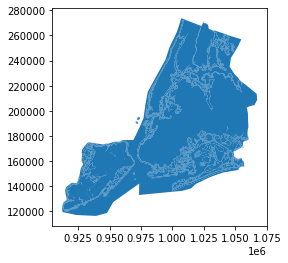

In [10]:
# quickly inspecting our map
pfirm_gdf.plot()

## 2.2 Replace -9999 Values with NULL

In [11]:
# replace -9999 values
for col in pfirm_gdf.columns:
    pfirm_gdf.loc[pfirm_gdf[col] == -9999, col] = np.nan
    
# summary statistics
pfirm_gdf.describe()    

,STATIC_BFE,DEPTH,VELOCITY,BFE_REVERT,DEP_REVERT
count,1153.000000,12.000000,0.0,0.0,0.0
mean,13.786644,2.333333,NaN,NaN,NaN
std,2.996455,0.887625,NaN,NaN,NaN
min,8.000000,1.000000,NaN,NaN,NaN
25%,12.000000,1.750000,NaN,NaN,NaN
50%,13.000000,3.000000,NaN,NaN,NaN
75%,15.000000,3.000000,NaN,NaN,NaN
max,34.000000,3.000000,NaN,NaN,NaN


In [12]:
# calculate null percentages
s1 = (
    pfirm_gdf
    .isnull()
    .sum()
    .sort_values(ascending=False)
)

s2 = (
    pfirm_gdf
    .isnull()
    .sum()
    .sort_values(ascending=False)
    .div(pfirm_gdf.shape[0])
    .round(3)
)

pd.concat(
    [s1.rename('count_null'), s2.rename('normalized')],
    axis=1
)

,count_null,normalized
VELOCITY,3985,1.000
VEL_UNIT,3985,1.000
AR_REVERT,3985,1.000
BFE_REVERT,3985,1.000
DEP_REVERT,3985,1.000
DEPTH,3973,0.997
FLOODWAY,3938,0.988
STATIC_BFE,2832,0.711
V_DATUM,2832,0.711
LEN_UNIT,2820,0.708


In [13]:
# preview columns with 100% null values
pfirm_gdf.loc[:, pfirm_gdf.isnull().all()]

,VELOCITY,VEL_UNIT,AR_REVERT,BFE_REVERT,DEP_REVERT
0,NaN,None,None,NaN,NaN
1,NaN,None,None,NaN,NaN
2,NaN,None,None,NaN,NaN
3,NaN,None,None,NaN,NaN
4,NaN,None,None,NaN,NaN
...,...,...,...,...,...
3980,NaN,None,None,NaN,NaN
3981,NaN,None,None,NaN,NaN
3982,NaN,None,None,NaN,NaN
3983,NaN,None,None,NaN,NaN


In [14]:
# exclude columns where 100% null values
ser = pfirm_gdf.isnull().all()
all_null_cols = ser.loc[ser].index.to_list()

# drop these columns
pfirm_gdf = pfirm_gdf.loc[:, ~pfirm_gdf.columns.isin(all_null_cols)]

# recalculate null percentages
s1 = (
    pfirm_gdf
    .isnull()
    .sum()
    .sort_values(ascending=False)
)

s2 = (
    pfirm_gdf
    .isnull()
    .sum()
    .sort_values(ascending=False)
    .div(pfirm_gdf.shape[0])
    .round(3)
)

pd.concat(
    [s1.rename('count_null'), s2.rename('normalized')],
    axis=1
)

,count_null,normalized
DEPTH,3973,0.997
FLOODWAY,3938,0.988
STATIC_BFE,2832,0.711
V_DATUM,2832,0.711
LEN_UNIT,2820,0.708
FLD_AR_ID,0,0.000
FLD_ZONE,0,0.000
SFHA_TF,0,0.000
SOURCE_CIT,0,0.000
geometry,0,0.000


In [15]:
# preview FLOODWAY column
pfirm_gdf['FLOODWAY'].value_counts(normalize=True, dropna=False)

None        0.988206
FLOODWAY    0.011794
Name: FLOODWAY, dtype: float64

In [16]:
# preview non-null values
pfirm_gdf.loc[pfirm_gdf['FLOODWAY'].notnull(), ['FLOODWAY']].head()

,FLOODWAY
41,FLOODWAY
85,FLOODWAY
152,FLOODWAY
153,FLOODWAY
420,FLOODWAY


Although `FLOODWAY` is 99% null, it still has non-null values. Let's keep the column.

## 2.3 Inspecting Geometry Column

In [17]:
# preview geometry column
pfirm_gdf['geometry'].head()

0    POLYGON ((1032001.691 263867.839, 1032006.047 ...
1    POLYGON ((1033748.952 263778.464, 1033752.656 ...
2    POLYGON ((1033309.701 263544.181, 1033322.210 ...
3    POLYGON ((1033414.148 262658.868, 1033414.934 ...
4    POLYGON ((1034089.115 262466.034, 1034089.402 ...
Name: geometry, dtype: geometry

In [18]:
# summary of column
pfirm_gdf['geometry'].info()

<class 'geopandas.geoseries.GeoSeries'>
RangeIndex: 3985 entries, 0 to 3984
Series name: geometry
Non-Null Count  Dtype   
--------------  -----   
3985 non-null   geometry
dtypes: geometry(1)
memory usage: 31.3 KB


In [19]:
# reviewing the geometry's coordinate referance system (CRS)
pfirm_gdf.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

From the `.crs` attribute above, our geometry's CRS is *NAD83 / New York Long Island (ftUS)* - code 2263.
Our units are in feet.

In [20]:
# looking at the values in the V_DATUM column
pfirm_gdf['V_DATUM'].value_counts()

NAVD88    1153
Name: V_DATUM, dtype: int64

We could potentially drop this column and just record the vertical datum on the page, but this does provide useful information. Let's keep it.

In [21]:
v_datum = pfirm_gdf['V_DATUM'].value_counts().index[0]

print('The vertical datum for this geometry is: {}.'.format(v_datum))

The vertical datum for this geometry is: NAVD88.


There's a lot of useful information stored in our geometry column, but for now, let's continue and inspect our flood zone values.

# 3. Inspecting Flood Zones and Base Flood Elevations

Definitions from our [data dictionary](https://github.com/mebauer/nyc-floodzone-analysis/blob/master/data-dictionary.pdf):

FLD_ZONE
>Flood Zone Lookup Identification. This is a code that provides a link to a valid entry from the D_Zone table. This is the flood zone label/abbreviation for the area.

STATIC_BFE
>Static Base Flood Elevation. For areas of constant Base Flood Elevation (BFE), the BFE value is shown beneath the zone label rather than on a BFE line. In this situation the same BFE applies to the entire polygon. This is normally occurs in lakes or coastal zones. This field is only populated where a static BFE is shown on the FIRM.

DEPTH
>Depth Value for Zone AO Areas. This is shown beneath the zone label on the FIRM. This field is only populated if a depth is shown on the FIRM.

SFHA_TF
>Special Flood Hazard Area. If the area is within SFHA this field would be True. This field will be true for any area that is coded for any A or V zone flood areas. It should be false for any X or D zone flood areas. Enter “T” for true or “F” for false.

Brief definition of FEMA's flood zones:

>Flood hazard areas identified on the Flood Insurance Rate Map are identified as a Special Flood Hazard Area (SFHA). SFHA are defined as the area that will be inundated by the flood event having a 1-percent chance of being equaled or exceeded in any given year. The 1-percent annual chance flood is also referred to as the base flood or 100-year flood. SFHAs are labeled as Zone A, Zone AO, Zone AH, Zones A1-A30, Zone AE, Zone A99, Zone AR, Zone AR/AE, Zone AR/AO, Zone AR/A1-A30, Zone AR/A, Zone V, Zone VE, and Zones V1-V30. Moderate flood hazard areas, labeled Zone B or Zone X (shaded) are also shown on the FIRM, and are the areas between the limits of the base flood and the 0.2-percent-annual-chance (or 500-year) flood. The areas of minimal flood hazard, which are the areas outside the SFHA and higher than the elevation of the 0.2-percent-annual-chance flood, are labeled Zone C or Zone X (unshaded).  

Source: https://www.fema.gov/glossary/flood-zones

## 3.1 Inspect Flood Zones

In [22]:
# reviewing count of items in the FLD_ZONE column
pfirm_gdf['FLD_ZONE'].value_counts()

0.2 PCT ANNUAL CHANCE FLOOD HAZARD    1726
AE                                    1269
X                                      529
VE                                     420
A                                       21
AO                                      12
OPEN WATER                               8
Name: FLD_ZONE, dtype: int64

From a quick glance, we can probably drop the `OPEN WATER` value, as this is probably only the outline of a water boundary. Additionally, zone 'X' doesn't tell us any useul information about flood zones.

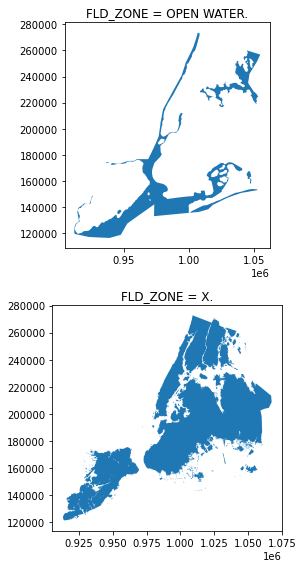

In [23]:
# brief plots of these zones
zone_checks = ['OPEN WATER', 'X']

fig, axs = plt.subplots(2, 1, figsize=(8, 8))

for zone, ax in zip(zone_checks, axs.flat):
    
    pfirm_gdf[pfirm_gdf['FLD_ZONE'].isin([zone])].plot(ax=ax)
    ax.set_title('FLD_ZONE = {}.'.format(zone))
    
fig.tight_layout()

Let's look at summary statistics.

In [24]:
# reviewing summary statistics for base flood elevations by flood zone
pfirm_gdf.groupby(by=['FLD_ZONE'])['STATIC_BFE'].describe()

,count,mean,std,min,25%,50%,75%,max
FLD_ZONE,,,,,,,,
0.2 PCT ANNUAL CHANCE FLOOD HAZARD,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AE,733.0,12.442019,1.888557,8.0,11.0,12.0,14.0,23.0
AO,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OPEN WATER,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VE,420.0,16.133333,3.126045,11.0,14.0,16.0,17.0,34.0
X,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# zones with base flood elevations
bfe_df = (
    pfirm_gdf
    .groupby(by=['FLD_ZONE'])['STATIC_BFE']
    .describe()
)

bfe_df.loc[bfe_df['max'] > 0]

,count,mean,std,min,25%,50%,75%,max
FLD_ZONE,,,,,,,,
AE,733.0,12.442019,1.888557,8.0,11.0,12.0,14.0,23.0
VE,420.0,16.133333,3.126045,11.0,14.0,16.0,17.0,34.0


In [26]:
zones = bfe_df.loc[bfe_df['max'] > 0].index.to_list()
print('Zones {} are the only zones that have static base flood elevations.'.format(zones))

Zones ['AE', 'VE'] are the only zones that have static base flood elevations.


In [27]:
# reviewing summary statistics for depth elevations by flood zone
pfirm_gdf.groupby(by=['FLD_ZONE'])['DEPTH'].describe()

,count,mean,std,min,25%,50%,75%,max
FLD_ZONE,,,,,,,,
0.2 PCT ANNUAL CHANCE FLOOD HAZARD,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AE,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AO,12.0,2.333333,0.887625,1.0,1.75,3.0,3.0,3.0
OPEN WATER,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VE,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# zones with base flood elevations
depths_df = (
    pfirm_gdf
    .groupby(by=['FLD_ZONE'])['DEPTH']
    .describe()
)

depths_df.loc[depths_df['max'] > 0]

,count,mean,std,min,25%,50%,75%,max
FLD_ZONE,,,,,,,,
AO,12.0,2.333333,0.887625,1.0,1.75,3.0,3.0,3.0


In [29]:
depths = depths_df.loc[depths_df['max'] > 0].index.to_list()
print('Zone {} is the only zone that has a depth elevation.'.format(depths))

Zone ['AO'] is the only zone that has a depth elevation.


In [30]:
sfha_df = (
    pfirm_gdf
    .groupby(by=['SFHA_TF', 'FLD_ZONE'])['STATIC_BFE']
    .describe()
)

sfha_df.sort_values(by='SFHA_TF', ascending=False)

count       mean       std   min  \
SFHA_TF FLD_ZONE                                                               
T       A                                     0.0        NaN       NaN   NaN   
        AE                                  733.0  12.442019  1.888557   8.0   
        AO                                    0.0        NaN       NaN   NaN   
        VE                                  420.0  16.133333  3.126045  11.0   
F       0.2 PCT ANNUAL CHANCE FLOOD HAZARD    0.0        NaN       NaN   NaN   
        OPEN WATER                            0.0        NaN       NaN   NaN   
        X                                     0.0        NaN       NaN   NaN   

                                             25%   50%   75%   max  
SFHA_TF FLD_ZONE                                                    
T       A                                    NaN   NaN   NaN   NaN  
        AE                                  11.0  12.0  14.0  23.0  
        AO                                   NaN   NaN   NaN   NaN  
        VE                                  14.0  16.0  17.0  34.0  
F       0.2 PCT ANNUAL CHANCE FLOOD HAZARD   NaN   NaN   NaN   NaN  
        OPEN WATER                           NaN   NaN   NaN   NaN  
        X                                    NaN   NaN   NaN   NaN

Although zones A & AO don't have base flood elevations, they are inside the special flood hazard area (SFHA). Thus, we can not drop them. 


`T` stands for **True** and `F` stands for **False**.

## 3.2 Dropping X and Open Water Zones

There are two flood zones in particular, X and OPEN WATER, that may be good candidates to drop. We don't want to drop any flood zones in the special flood hazard area (AE, VE, A, and AO), and we also don't want to drop the 0.2 % annual chance flood zone (although outside of the special flood hazard area, this information is still quite useful). Let's see if we can safely drop the previously mentioned values safely.

In [31]:
# number of records in each flood zone
pfirm_gdf['FLD_ZONE'].value_counts()

0.2 PCT ANNUAL CHANCE FLOOD HAZARD    1726
AE                                    1269
X                                      529
VE                                     420
A                                       21
AO                                      12
OPEN WATER                               8
Name: FLD_ZONE, dtype: int64

In [32]:
# preview the dataframe where flood zones are open water and x
(pfirm_gdf
 .loc[pfirm_gdf['FLD_ZONE'].isin(['OPEN WATER', 'X'])]
 .head()
)

,FLD_AR_ID,FLD_ZONE,FLOODWAY,SFHA_TF,STATIC_BFE,V_DATUM,DEPTH,LEN_UNIT,SOURCE_CIT,geometry
1,82,X,None,F,NaN,None,NaN,None,STUDY4,"POLYGON ((1033748.952 263778.464, 1033752.656 ..."
6,87,X,None,F,NaN,None,NaN,None,STUDY4,"POLYGON ((1034013.168 257011.473, 1034007.732 ..."
11,92,X,None,F,NaN,None,NaN,None,STUDY4,"POLYGON ((1043995.696 257160.314, 1043996.904 ..."
15,96,X,None,F,NaN,None,NaN,None,STUDY4,"POLYGON ((1034329.553 253484.038, 1034317.702 ..."
19,100,X,None,F,NaN,None,NaN,None,STUDY4,"POLYGON ((1029438.728 251094.008, 1029442.937 ..."


In [33]:
# summary statistics where flood zones are open water and x
(pfirm_gdf
 .loc[pfirm_gdf['FLD_ZONE'].isin(['OPEN WATER', 'X'])]
 .iloc[:, :-1]
 .describe(include='all')
)

,FLD_AR_ID,FLD_ZONE,FLOODWAY,SFHA_TF,STATIC_BFE,V_DATUM,DEPTH,LEN_UNIT,SOURCE_CIT
count,537,537,0,537,0.0,0,0.0,0,537
unique,537,2,0,1,NaN,0,NaN,0,2
top,82,X,NaN,F,NaN,NaN,NaN,NaN,STUDY4
freq,1,529,NaN,537,NaN,NaN,NaN,NaN,533
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# preview count of records grouped by flood zones are open water and x
d1 = (
    pfirm_gdf
    .loc[pfirm_gdf['FLD_ZONE'].isin(['OPEN WATER', 'X'])]
    .groupby(by=['FLD_ZONE', 'SFHA_TF'])
    .count()
)

d1

,,FLD_AR_ID,FLOODWAY,STATIC_BFE,V_DATUM,DEPTH,LEN_UNIT,SOURCE_CIT,geometry
FLD_ZONE,SFHA_TF,,,,,,,,
OPEN WATER,F,8,0,0,0,0,0,8,8
X,F,529,0,0,0,0,0,529,529


In [35]:
print('Number of records in total data frame: {:,}'.format(pfirm_gdf.shape[0]))

length = pfirm_gdf.loc[pfirm_gdf['FLD_ZONE'].isin(['OPEN WATER', 'X'])].shape[0]
print('Number of records to drop where flood zone is open water and x: {:,}'.format(length))

pfirm_gdf = pfirm_gdf.loc[~pfirm_gdf['FLD_ZONE'].isin(['OPEN WATER', 'X'])]
print('Number of records in dataframe after dropping open water and x zones: {:,}'.format(pfirm_gdf.shape[0]))

Number of records in total data frame: 3,985
Number of records to drop where flood zone is open water and x: 537
Number of records in dataframe after dropping open water and x zones: 3,448


In [36]:
# our dropped flood zones are no longer included in dataframe
pfirm_gdf.groupby(by=['SFHA_TF', 'FLD_ZONE']).count()

FLD_AR_ID  FLOODWAY  STATIC_BFE  \
SFHA_TF FLD_ZONE                                                              
F       0.2 PCT ANNUAL CHANCE FLOOD HAZARD       1726         0           0   
T       A                                          21         0           0   
        AE                                       1269        47         733   
        AO                                         12         0           0   
        VE                                        420         0         420   

                                            V_DATUM  DEPTH  LEN_UNIT  \
SFHA_TF FLD_ZONE                                                       
F       0.2 PCT ANNUAL CHANCE FLOOD HAZARD        0      0         0   
T       A                                         0      0         0   
        AE                                      733      0       733   
        AO                                        0     12        12   
        VE                                      420      0       420   

                                            SOURCE_CIT  geometry  
SFHA_TF FLD_ZONE                                                  
F       0.2 PCT ANNUAL CHANCE FLOOD HAZARD        1726      1726  
T       A                                           21        21  
        AE                                        1269      1269  
        AO                                          12        12  
        VE                                         420       420

In [37]:
# number of records in each flood zone
pfirm_gdf['FLD_ZONE'].value_counts()

0.2 PCT ANNUAL CHANCE FLOOD HAZARD    1726
AE                                    1269
VE                                     420
A                                       21
AO                                      12
Name: FLD_ZONE, dtype: int64

<AxesSubplot:>

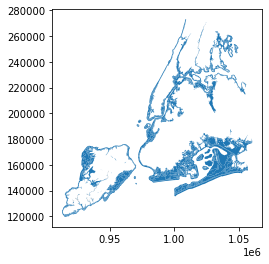

In [38]:
# a quick preview of our map after dropping open water and x flood zones
pfirm_gdf.plot()

In [39]:
# summary of data
pfirm_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 3448 entries, 0 to 3984
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FLD_AR_ID   3448 non-null   object  
 1   FLD_ZONE    3448 non-null   object  
 2   FLOODWAY    47 non-null     object  
 3   SFHA_TF     3448 non-null   object  
 4   STATIC_BFE  1153 non-null   float64 
 5   V_DATUM     1153 non-null   object  
 6   DEPTH       12 non-null     float64 
 7   LEN_UNIT    1165 non-null   object  
 8   SOURCE_CIT  3448 non-null   object  
 9   geometry    3448 non-null   geometry
dtypes: float64(2), geometry(1), object(7)
memory usage: 296.3+ KB


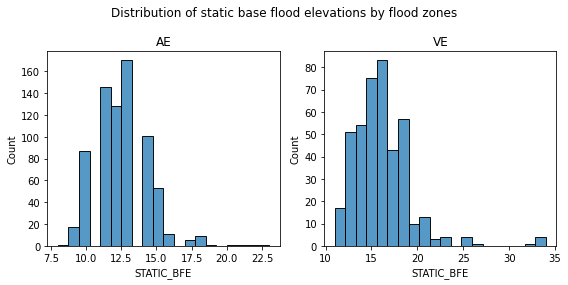

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
zones = ['AE', 'VE']

for zone, ax in zip(zones, axs.flat):

    sns.histplot(
        data=pfirm_gdf.loc[pfirm_gdf['FLD_ZONE'].isin([zone])], 
        x='STATIC_BFE', 
        bins=20,
        ax=ax
    )

    ax.set_title('{}'.format(zone))
    
plt.suptitle('Distribution of static base flood elevations by flood zones', fontsize=12)
fig.tight_layout()

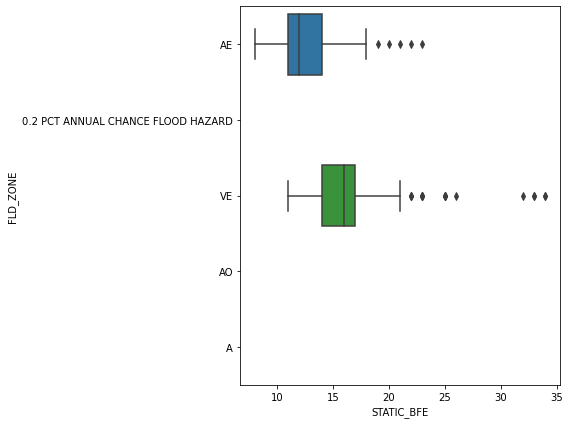

In [41]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(
    data=pfirm_gdf,
    y="FLD_ZONE",
    x="STATIC_BFE",
    ax=ax
)

plt.tight_layout()

In [42]:
# previewing count of records by within special flood hazard area
pfirm_gdf['SFHA_TF'].value_counts()

F    1726
T    1722
Name: SFHA_TF, dtype: int64

In [43]:
# summary statistics of static base flood elevations by special flood hazard area
pfirm_gdf.groupby(by=['SFHA_TF'])['STATIC_BFE'].describe()

,count,mean,std,min,25%,50%,75%,max
SFHA_TF,,,,,,,,
F,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T,1153.0,13.786644,2.996455,8.0,12.0,13.0,15.0,34.0


# 4. Generate Maps

## 4.1 Mapping Flood Zones

![borough_boundaries](images/nyc-borough-screenshot.png)

*Figure xx. Screenshot of borough boundaries page on NYC Open Data*

Website link: https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm

In [44]:
# importing borough boundaries for better aesthetics
path = 'https://data.cityofnewyork.us/api/geospatial/tqmj-j8zm?method=export&format=Shapefile'
borough_gdf = gpd.read_file(path)

borough_gdf.head()

,boro_code,boro_name,shape_area,shape_leng,geometry
0,3.0,Brooklyn,1.934143e+09,728150.705111,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."
1,5.0,Staten Island,1.623619e+09,325910.306061,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
2,1.0,Manhattan,6.366456e+08,360056.730857,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
3,2.0,Bronx,1.187175e+09,463180.578878,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
4,4.0,Queens,3.041418e+09,888197.010944,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."


Text(0.5, 1.0, 'nyc boroughs')

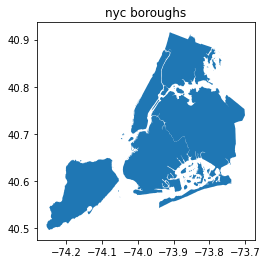

In [45]:
# quick plot of boroughs
borough_gdf.plot()
plt.title('nyc boroughs')

epsg:2263


Text(0.5, 1.0, 'nyc boroughs')

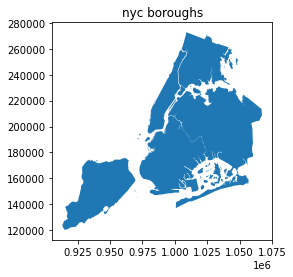

In [46]:
# converting to the state plane crs of our floodzone dataframe
borough_gdf = borough_gdf.to_crs(epsg=2263)
print(borough_gdf.crs)

borough_gdf.plot()
plt.title('nyc boroughs')

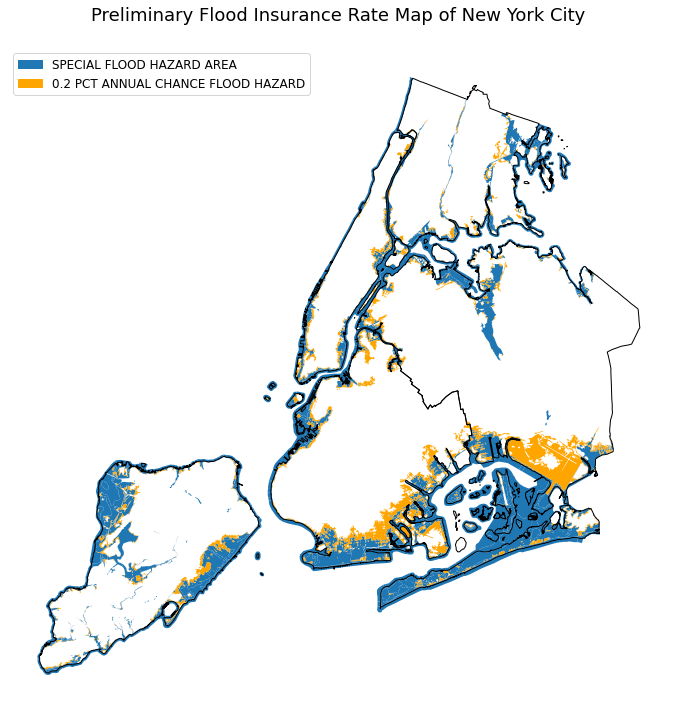

In [47]:
fig, ax = plt.subplots(figsize=(10, 10))

(pfirm_gdf
 .loc[~pfirm_gdf['FLD_ZONE'].isin(['0.2 PCT ANNUAL CHANCE FLOOD HAZARD'])]
 .plot(color='C0', ax=ax, zorder=0)
)

(pfirm_gdf
 .loc[pfirm_gdf['FLD_ZONE'].isin(['0.2 PCT ANNUAL CHANCE FLOOD HAZARD'])]
 .plot(color='orange', ax=ax)
)

borough_gdf.plot(
    ax=ax, 
    facecolor='none', 
    edgecolor='black', 
    zorder=2
)

blue_patch = mpatches.Patch(color='C0', label='SPECIAL FLOOD HAZARD AREA')
orange_patch = mpatches.Patch(color='orange', label='0.2 PCT ANNUAL CHANCE FLOOD HAZARD')

plt.legend( 
    handles=[blue_patch, orange_patch], 
    fontsize='large', 
    title_fontsize='large',
    loc=2
)

plt.axis('off')
plt.title('Preliminary Flood Insurance Rate Map of New York City\n', fontsize=18)
plt.tight_layout()

plt.savefig('figures/pfirm-nyc-map.png', bbox_inches='tight', dpi=300)

In [48]:
pfirm_gdf['FLD_ZONE'].value_counts()

0.2 PCT ANNUAL CHANCE FLOOD HAZARD    1726
AE                                    1269
VE                                     420
A                                       21
AO                                      12
Name: FLD_ZONE, dtype: int64

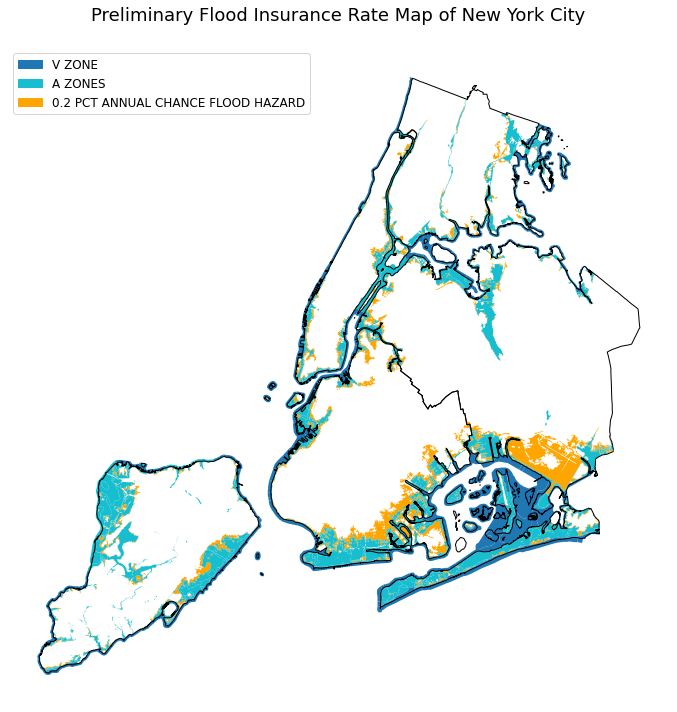

In [49]:
fig, ax = plt.subplots(figsize=(10, 10))

(pfirm_gdf
 .loc[pfirm_gdf['FLD_ZONE'].isin(['VE'])]
 .plot(color='tab:blue', ax=ax, zorder=2)
)

(pfirm_gdf
 .loc[pfirm_gdf['FLD_ZONE'].isin(['AE', 'A', 'AO'])]
 .plot(color='tab:cyan', ax=ax, zorder=1)
)

(pfirm_gdf
 .loc[pfirm_gdf['FLD_ZONE'].isin(['0.2 PCT ANNUAL CHANCE FLOOD HAZARD'])]
 .plot(color='orange', ax=ax, zorder=0)
)

borough_gdf.plot(
    ax=ax, 
    facecolor='none', 
    edgecolor='black', 
    zorder=2
)

v_patch = mpatches.Patch(color='tab:blue', label='V ZONE')
a_patch = mpatches.Patch(color='tab:cyan', label='A ZONES')
patch = mpatches.Patch(color='orange', label='0.2 PCT ANNUAL CHANCE FLOOD HAZARD')

plt.legend( 
    handles=[v_patch, a_patch, patch], 
    fontsize='large', 
    title_fontsize='large',
    loc=2
)

plt.axis('off')
plt.title('Preliminary Flood Insurance Rate Map of New York City\n', fontsize=18)
plt.tight_layout()

plt.savefig('figures/pfirm-zones.png', bbox_inches='tight', dpi=300)